In [30]:
import pandas as pd
from  sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,  plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  f1_score, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
df = pd.read_csv('Concrete_Data.csv')

In [22]:
df

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [24]:
X , y = df.drop('Strength', axis = 1) , df['Strength']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=24)

In [40]:
from sklearn.pipeline import Pipeline
from tqdm import tqdm 

scores = []
depth = [2,4,6,None]
split = [2,5,10,20]
leaf = [1,5,10,20]

scaler = StandardScaler()

for i in tqdm(range(len(depth))):
    for j in split:
        for k in leaf:
            dtr = DecisionTreeRegressor(random_state=24,max_depth=depth[i], min_samples_split=j,min_samples_leaf=k)
            pipe = Pipeline([('SCALER', scaler),('tdr', dtr)])
            pipe.fit(X_train,Y_train)
            y_pred = pipe.predict(X_test)
            scores.append([depth[i],j,k,r2_score(Y_test,y_pred)])

df1 = pd.DataFrame(scores)
df1.sort_values(3 , ascending = False) 
            

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13.59it/s]


,0,1,2,3
52,NaN,5,1,0.848471
48,NaN,2,1,0.830865
56,NaN,10,1,0.830692
57,NaN,10,5,0.814391
53,NaN,5,5,0.814391
...,...,...,...,...
13,2.0,20,5,0.366922
14,2.0,20,10,0.366922
15,2.0,20,20,0.366922
1,2.0,2,5,0.366922


In [48]:
dtr = DecisionTreeRegressor(random_state=24,max_depth=None, min_samples_split=5,min_samples_leaf=1)
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(min_samples_split=5, random_state=24)

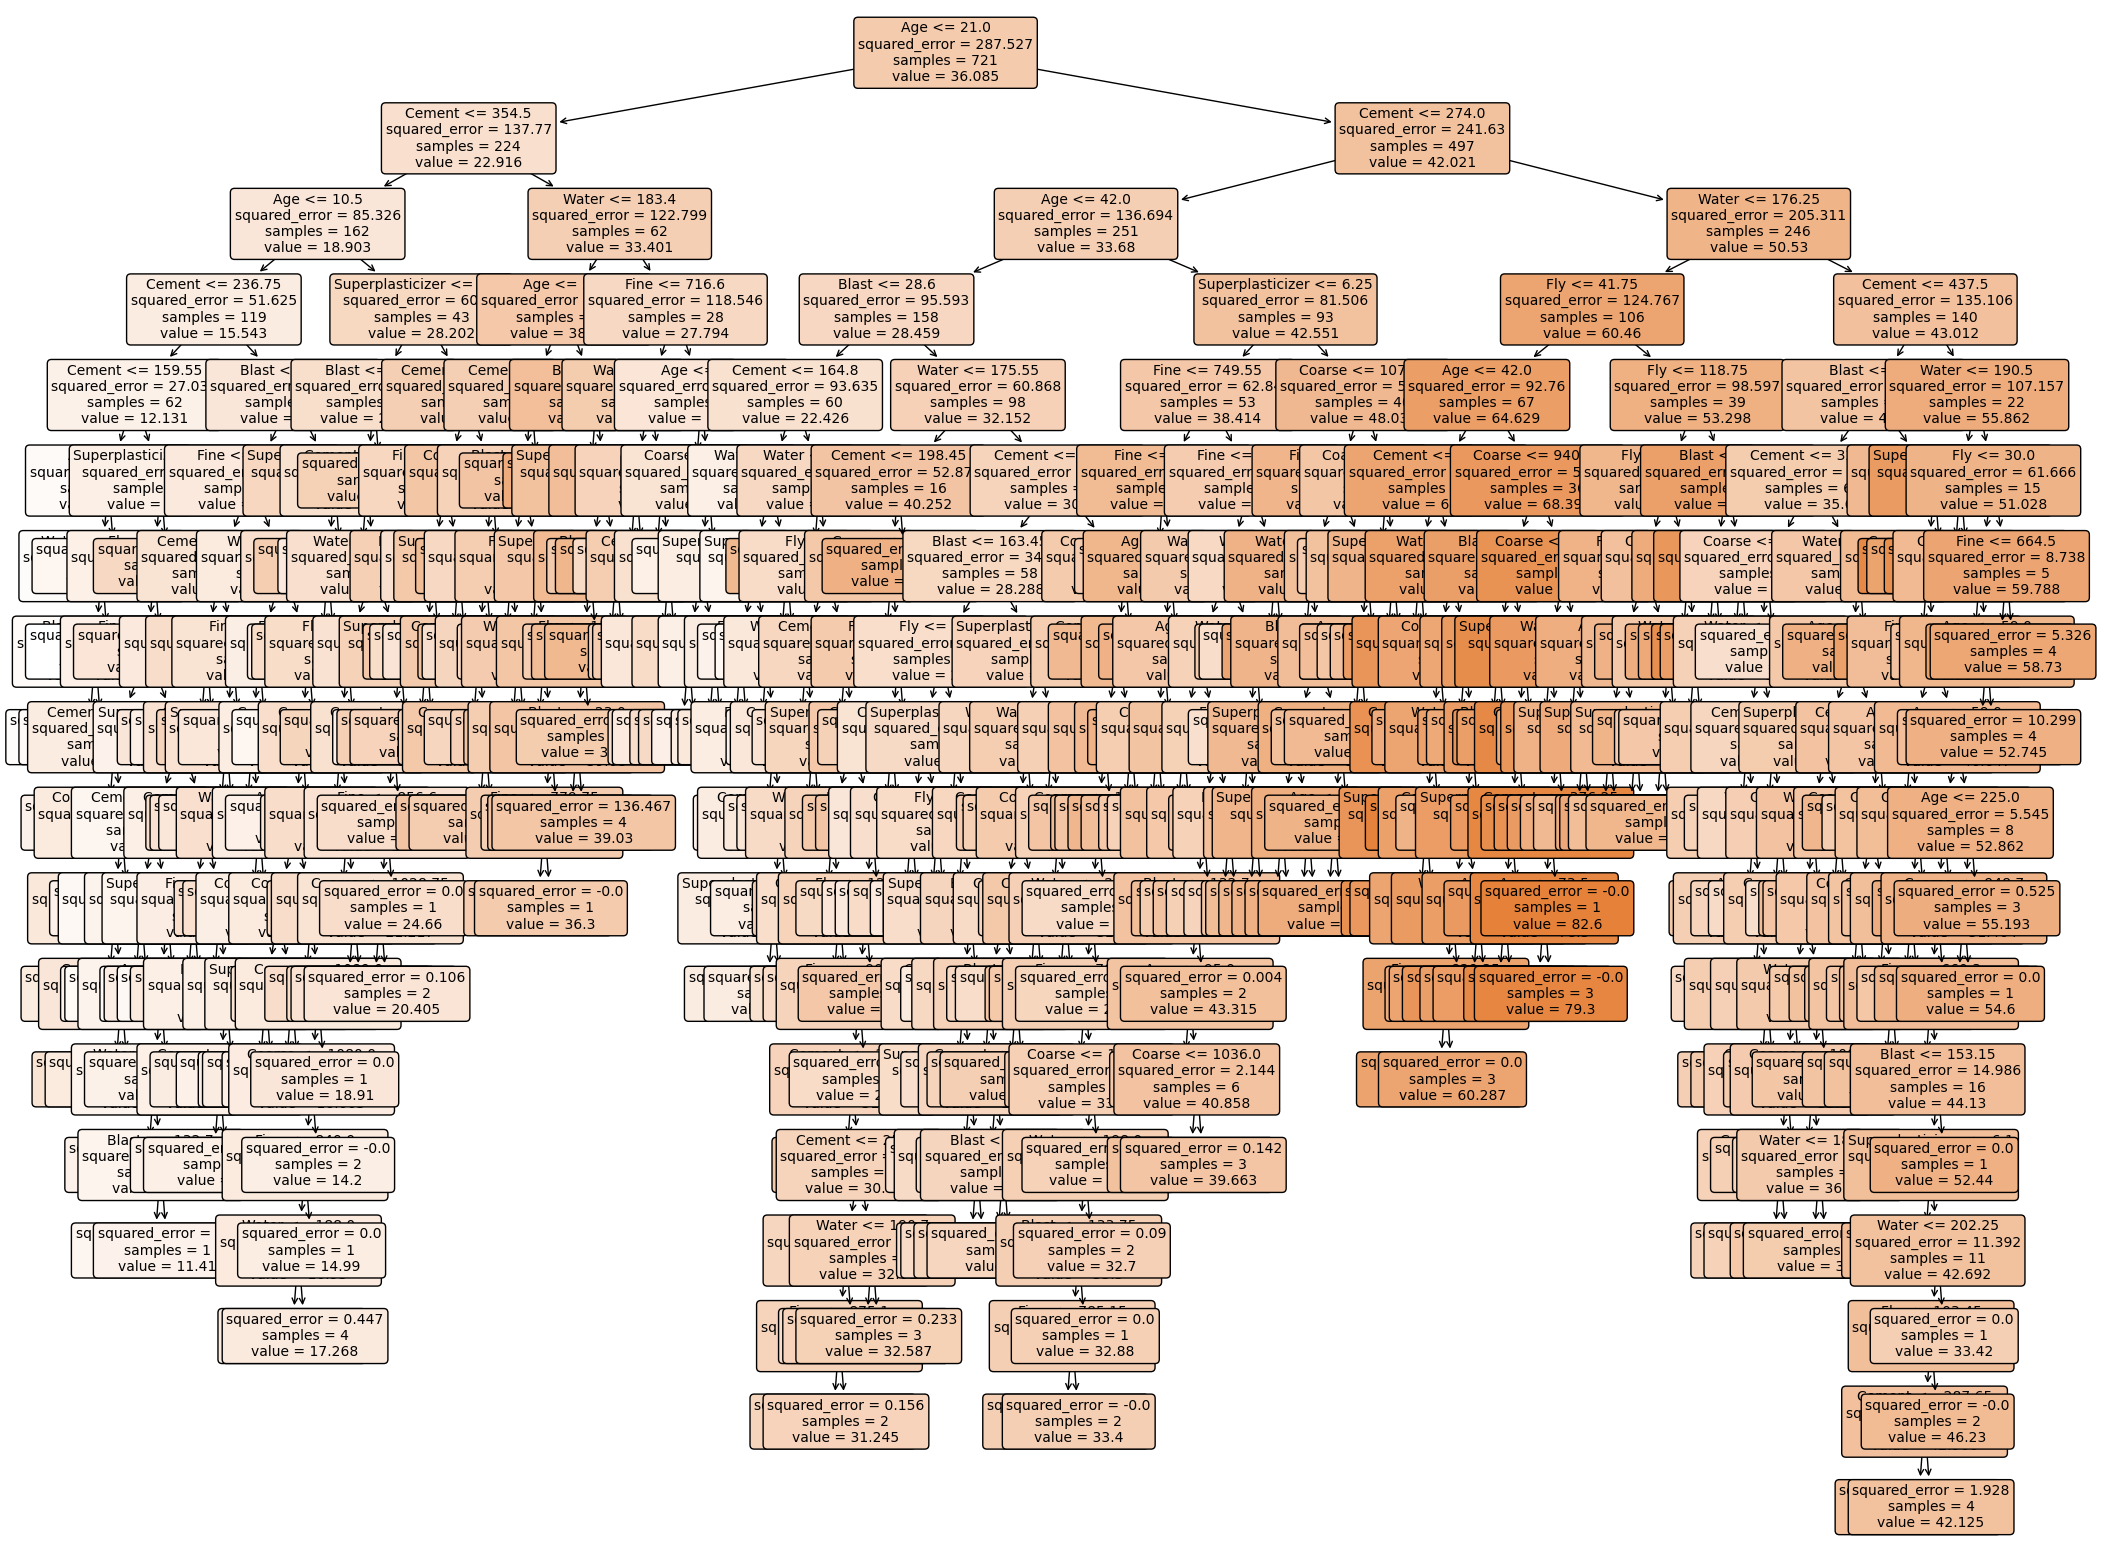

In [50]:
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 20))
plot_tree(
    dtr, 
    feature_names=list(X.columns),  # Corrected list syntax
               # Assuming these are the correct class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [52]:
df_imp = pd.DataFrame({'Importance':dtr.feature_importances_ , 'Column': list(X.columns)})
df_imp.sort_values('Importance', ascending=False)

,Importance,Column
7,0.378375,Age
0,0.293266,Cement
3,0.138374,Water
1,0.065525,Blast
2,0.036521,Fly
6,0.031958,Fine
4,0.031550,Superplasticizer
5,0.024430,Coarse


Text(0.5, 1.0, 'Features Importance')

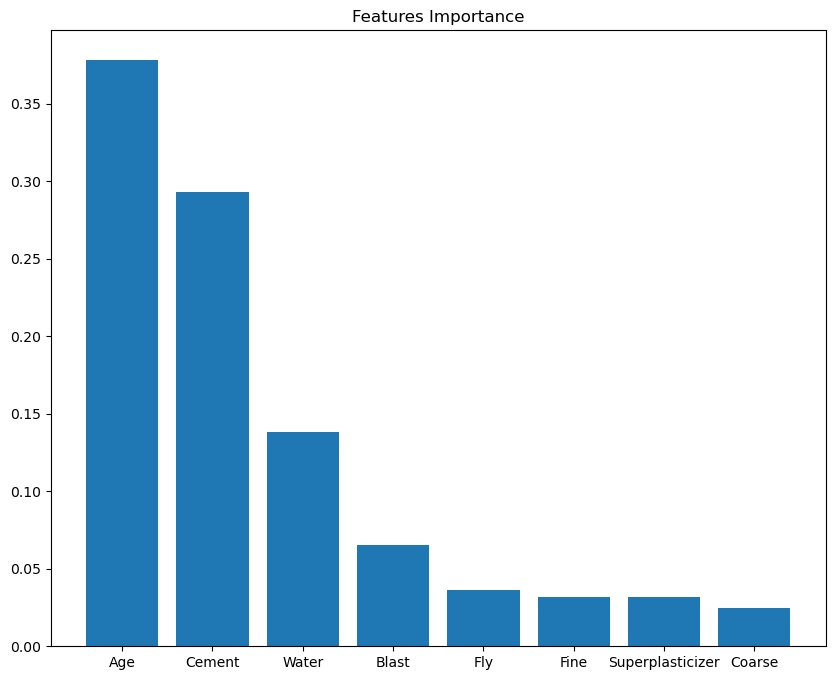

In [58]:


df_imp.sort_values( 'Importance' , ascending=False, inplace=True)
plt.figure(figsize=(10,8))
plt.bar(df_imp['Column'], df_imp['Importance'])
plt.title('Features Importance')